In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
df = pd.read_csv("car data.csv")

In [82]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [83]:
df.shape

(301, 9)

In [84]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


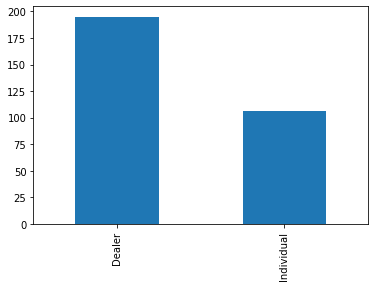

In [85]:
df["Seller_Type"].value_counts().plot(kind = "bar")

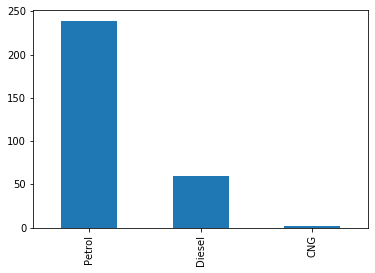

In [86]:
df["Fuel_Type"].value_counts().plot(kind = "bar")

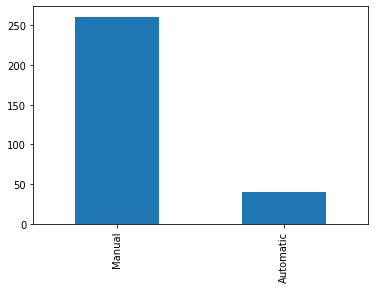

In [87]:
df["Transmission"].value_counts().plot(kind = "bar")

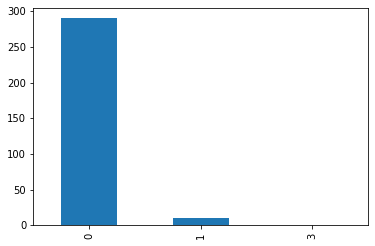

In [88]:
df["Owner"].value_counts().plot(kind = "bar")

In [89]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [90]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [91]:
df["age_in_years"]  = df["Year"].map(lambda x : (2021-x) )

In [92]:
df = df.drop("Car_Name"  , axis=1)

In [93]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'age_in_years'],
      dtype='object')

In [94]:
df = df.drop("Year"  , axis=1)

In [95]:
cat_data = [[ 'Fuel_Type','Seller_Type', 'Transmission']]

In [96]:
df = pd.concat([df , pd.get_dummies(df[['Fuel_Type','Seller_Type', 'Transmission']] , drop_first=True) ] , axis=1 )

In [97]:
df.drop([ 'Fuel_Type','Seller_Type', 'Transmission'] , axis=1 , inplace=True)

In [98]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,age_in_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [99]:
df.corr()["Selling_Price"].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
age_in_years             -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [100]:
X = df.drop("Selling_Price" , axis=1)
y = df["Selling_Price"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()
lr.fit(X_train , y_train)
lr.score(X_train , y_train)

0.8893463776762108

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [106]:
rf = RandomForestRegressor()

In [107]:
parameters={'n_estimators':[100,400],'max_depth':np.arange(4,30), 'min_samples_leaf' : [2,5,10,20,80],'min_samples_leaf':[2,5,10,15] , 'max_features' : ['auto' , 'sqrt']}

In [108]:
rs=RandomizedSearchCV(rf,param_distributions=parameters,n_jobs=-1,verbose=1,cv=4 , scoring="neg_mean_squared_error")

In [109]:
rs.fit(X_train , y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.5s finished
C:\Users\rohan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [110]:
print(rs.best_params_)
print(rs.best_score_)

{'n_estimators': 400, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 12}
-4.074778036609843


In [111]:
pred_lr = lr.predict(X_test)
pred_rf = rs.predict(X_test)

(array([ 1.,  1.,  5., 10., 62., 16.,  2.,  1.,  1.,  1.]),
 array([-4.93014944, -3.87979644, -2.82944345, -1.77909045, -0.72873746,
         0.32161554,  1.37196854,  2.42232153,  3.47267453,  4.52302752,
         5.57338052]),
 <a list of 10 Patch objects>)

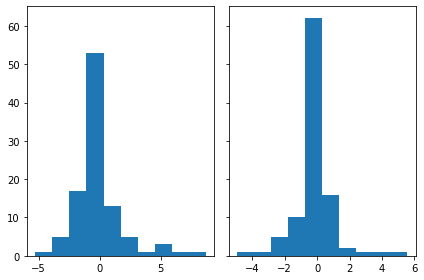

In [112]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(y_test-pred_lr)
axs[1].hist(y_test-pred_rf)

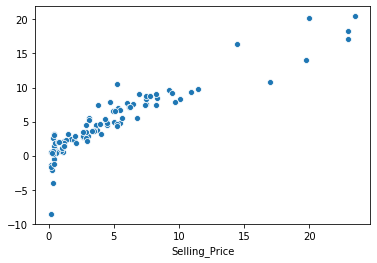

In [113]:
sns.scatterplot(y_test , pred_lr)

    

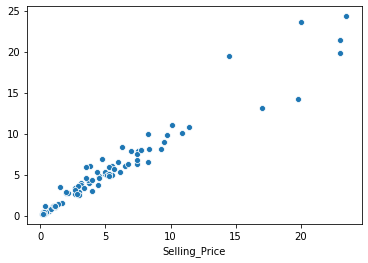

In [114]:
sns.scatterplot(y_test , pred_rf)

In [115]:
#import joblib

In [116]:
#joblib.dump( lr , "Linear_Regressor.pkl")


In [117]:
#joblib.dump( rs , "Random_Forest_Regressor.pkl")